<a href="https://colab.research.google.com/github/ShaheryarEhsan/ML_Labs/blob/main/Shaheryar_LSTM_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import datetime as dt
import torch
import random
import torch.nn as nn
import torch.optim as optim
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from torch.autograd import Variable
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [ ]:
211768%30

28

## Country For Analysis is Tajikistan

In [ ]:
read_file = pd.read_csv('covid_19_data.csv')

read_file

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
83406,83407,08/09/2020,Zaporizhia Oblast,Ukraine,2020-08-10 04:34:55,937.0,22.0,652.0
83407,83408,08/09/2020,Zeeland,Netherlands,2020-08-10 04:34:55,918.0,69.0,0.0
83408,83409,08/09/2020,Zhejiang,Mainland China,2020-08-10 04:34:55,1273.0,1.0,1268.0
83409,83410,08/09/2020,Zhytomyr Oblast,Ukraine,2020-08-10 04:34:55,2131.0,41.0,1524.0


In [ ]:
cleaned_file = read_file.drop(columns=['SNo', 'Last Update'])

# Change in Cases

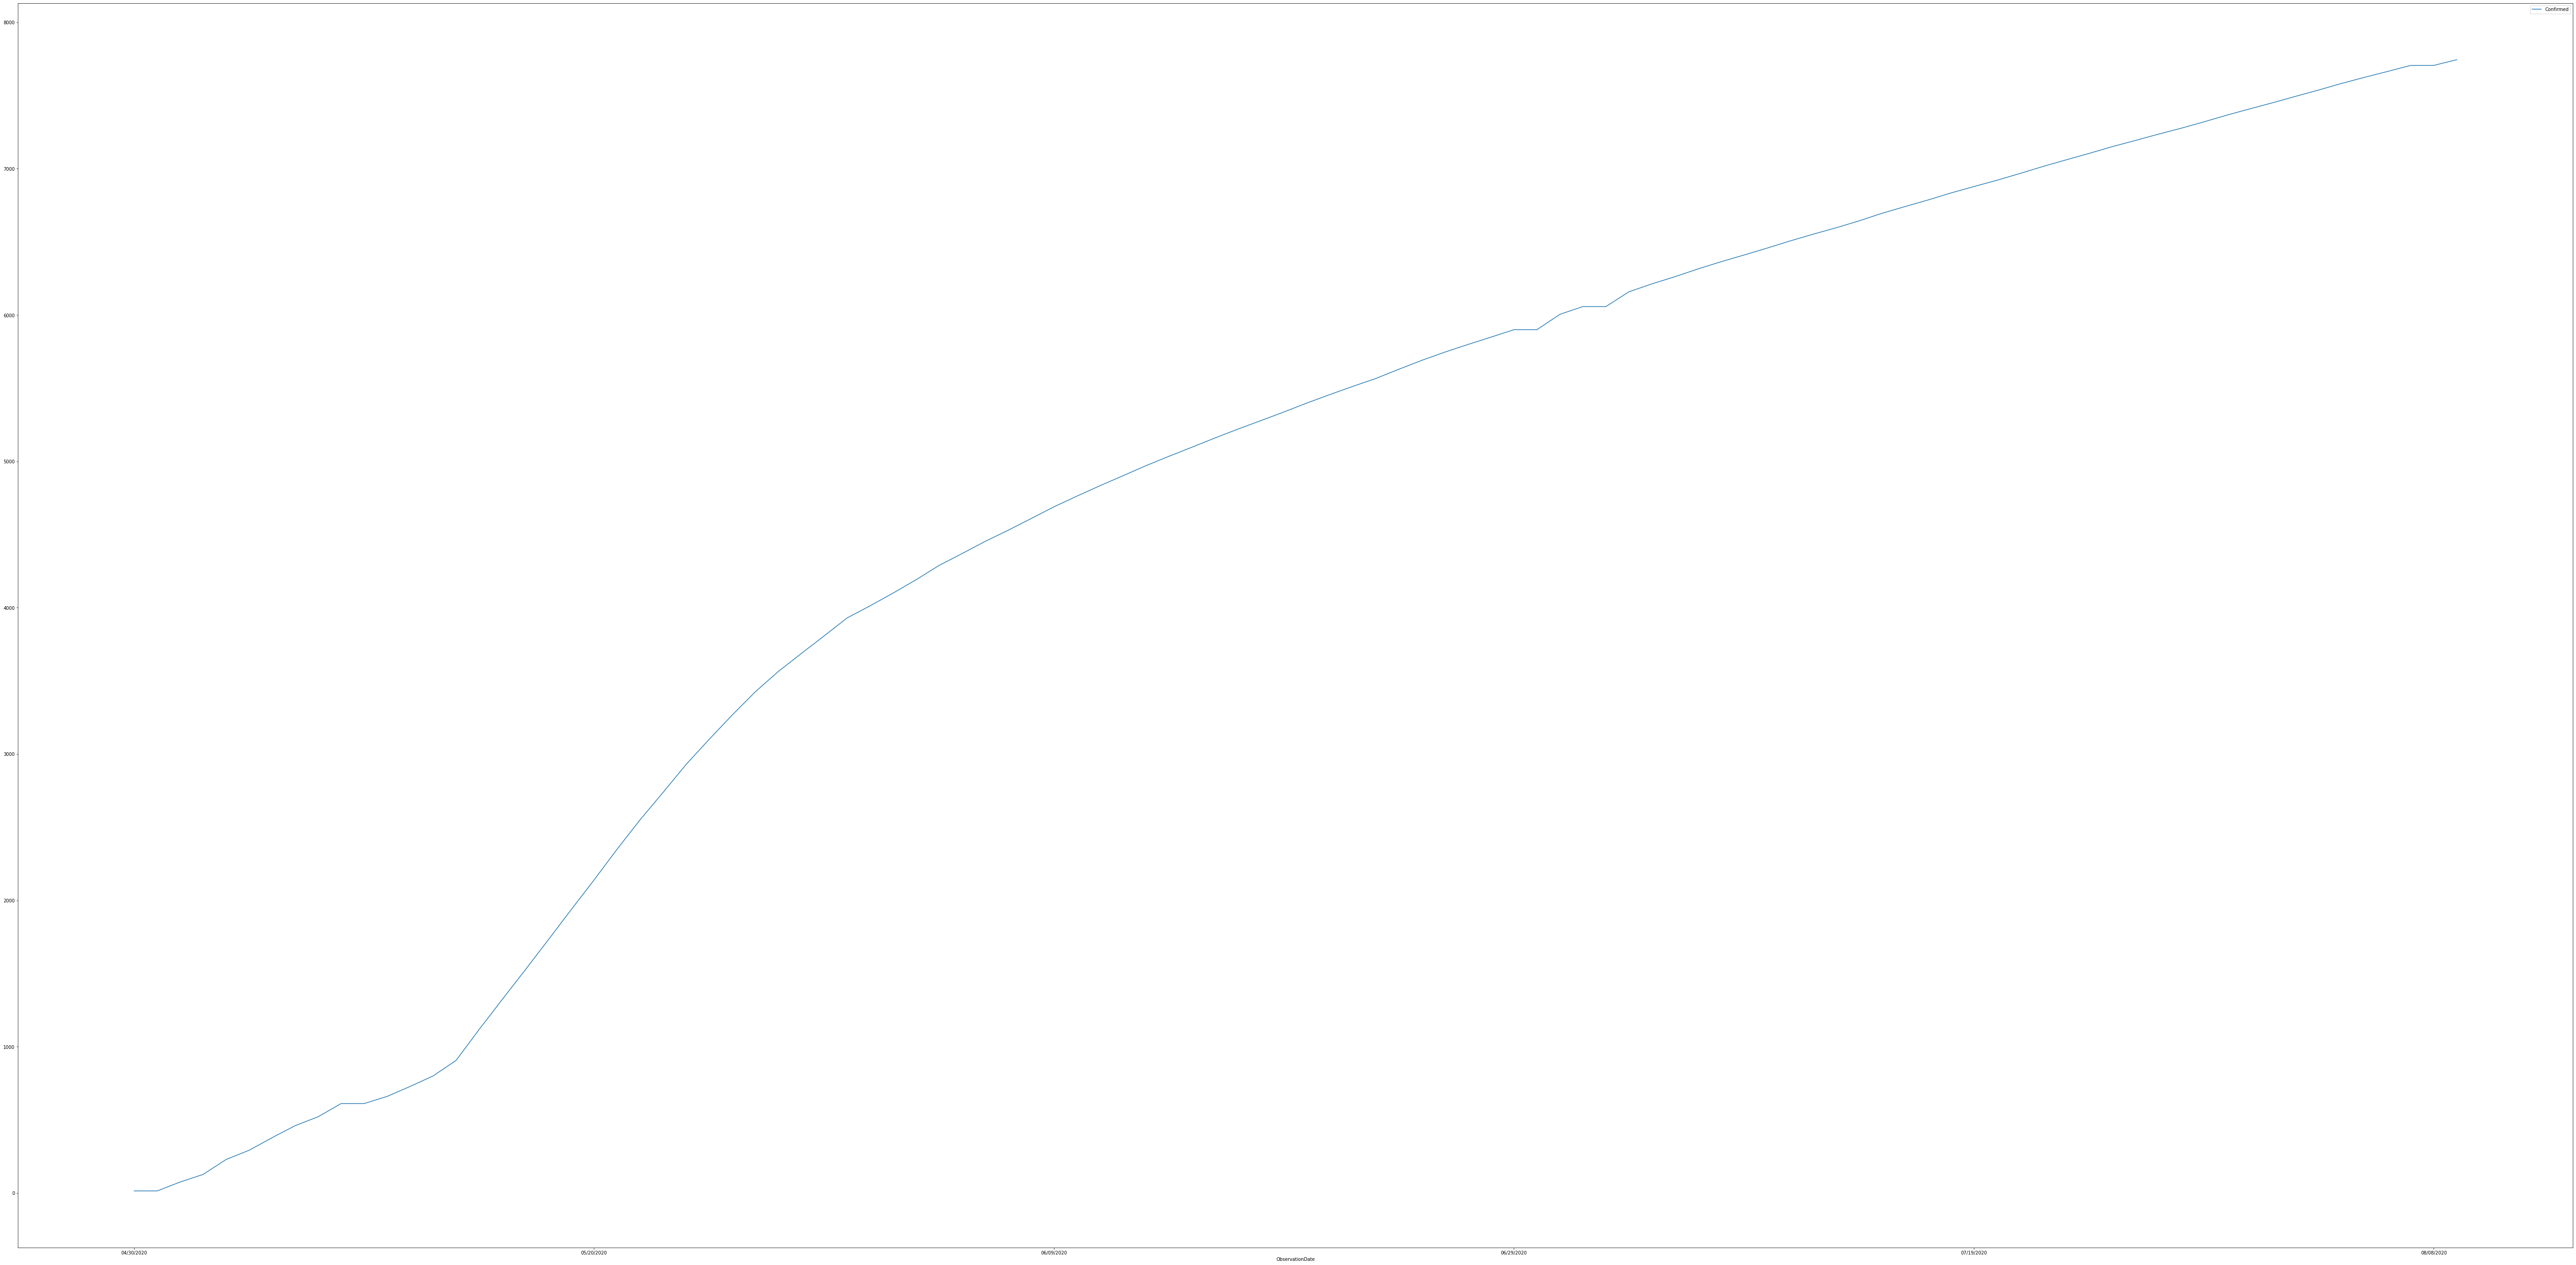

In [ ]:
Dates = cleaned_file.loc[cleaned_file['Country/Region'] == 'Tajikistan', 'ObservationDate'].unique()
cons_per_day = []
for i in Dates:
  cons = cleaned_file.loc[(cleaned_file['ObservationDate'] == i) & (cleaned_file['Country/Region'] == 'Tajikistan'), 'Confirmed'].sum()
  cons_per_day.append([i, cons])

dataframe_Tajikistan= pd.DataFrame(data=cons_per_day, columns=["ObservationDate", "Confirmed"])

dataframe_Tajikistan.plot.line(x="ObservationDate", figsize=(100,50))

In [ ]:
m = 1
cons_per_week = []
cons_per = 0
for i in Dates:
  cons = cleaned_file.loc[(cleaned_file['ObservationDate'] == i) & (cleaned_file['Country/Region'] == 'Tajikistan'), 'Confirmed'].sum()
  cons_per = cons_per + cons
  m = m+1
  if m > 7:
    cons_per_week.append([cons_per])
    m = 1
    cons_per = 0

cons_per_week

[[1136.0],
 [4398.0],
 [10676.0],
 [20358.0],
 [27290.0],
 [31703.0],
 [35220.0],
 [38183.0],
 [40891.0],
 [43429.0],
 [45859.0],
 [48142.0],
 [50337.0],
 [52467.0]]

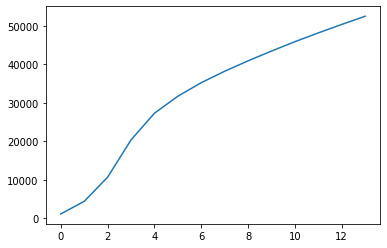

In [ ]:
plt.plot(cons_per_week)

The above graph shows change in cases per week

# Total Number of Cases Tajikistan

In [ ]:
Dates = cleaned_file.loc[cleaned_file['Country/Region'] == 'Tajikistan', 'ObservationDate'].unique()

In [ ]:
con_tajk = cleaned_file.loc[cleaned_file['Country/Region'] == 'Tajikistan', 'Confirmed'].sum()

print("Total Confirmed Cases of Tajikistan are:", con_tajk)

Total Confirmed Cases of Tajikistan are: 480911.0


In [ ]:
muslim_countries = pd.read_csv('muslim-countries.csv', names=["country"])
array = muslim_countries.to_numpy()
array

array([['Iran'],
       ['Saudi Arabia'],
       ['Bangladesh'],
       ['Turkey'],
       ['Iraq'],
       ['Indonesia'],
       ['Qatar'],
       ['Kazakhstan'],
       ['Egypt'],
       ['Oman'],
       ['Kuwait'],
       ['United Arab Emirates'],
       ['Nigeria'],
       ['Bahrain'],
       ['Kyrgyzstan'],
       ['Afghanistan'],
       ['Algeria'],
       ['Morocco'],
       ['Azerbaijan'],
       ['Uzbekistan'],
       ['Cameroon'],
       ['Pakistan'],
       ['Sudan'],
       ['Senegal'],
       ['Malaysia'],
       ['Guinea'],
       ['Gabon'],
       ['Tajikistan'],
       ['Lebanon'],
       ['Libya']], dtype=object)

In [ ]:
cons = []
for country in array:
  cons1 = cleaned_file.loc[cleaned_file['Country/Region'] == country[0], 'Confirmed'].sum()
  cons.append([country[0],cons1])
con_ranks = pd.DataFrame(cons)
con_ranks = con_ranks.sort_values(by = 1, ascending=False)
con_ranks

,0,1
0,Iran,23394764.0
3,Turkey,20946778.0
21,Pakistan,16363887.0
1,Saudi Arabia,16003163.0
2,Bangladesh,11916926.0
6,Qatar,7825550.0
5,Indonesia,5534434.0
8,Egypt,5370982.0
4,Iraq,4815322.0
11,United Arab Emirates,4453645.0


## Rank 27 out of 30 countries

## 2-B: Analyzing COVID-19 Trends and Flattening Curves [20 Marks]

In [ ]:
dataframe_Tajikistan

,ObservationDate,Confirmed
0,04/30/2020,15.0
1,05/01/2020,15.0
2,05/02/2020,76.0
3,05/03/2020,128.0
4,05/04/2020,230.0
...,...,...
97,08/05/2020,7625.0
98,08/06/2020,7665.0
99,08/07/2020,7706.0
100,08/08/2020,7706.0


In [ ]:
date = pd.to_datetime(dataframe_Tajikistan['ObservationDate'])
date

0     2020-04-30
1     2020-05-01
2     2020-05-02
3     2020-05-03
4     2020-05-04
         ...    
97    2020-08-05
98    2020-08-06
99    2020-08-07
100   2020-08-08
101   2020-08-09
Name: ObservationDate, Length: 102, dtype: datetime64[ns]

In [ ]:
cases = dataframe_Tajikistan['Confirmed']
cases

0        15.0
1        15.0
2        76.0
3       128.0
4       230.0
        ...  
97     7625.0
98     7665.0
99     7706.0
100    7706.0
101    7745.0
Name: Confirmed, Length: 102, dtype: float64

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(cases[:,None])

seq_length = 5
x, y = sliding_windows(training_data, seq_length)

train_size = 25
test_size = 17

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 3
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.01556
Epoch: 100, loss: 0.00009
Epoch: 200, loss: 0.00008
Epoch: 300, loss: 0.00008
Epoch: 400, loss: 0.00008
Epoch: 500, loss: 0.00007
Epoch: 600, loss: 0.00007
Epoch: 700, loss: 0.00006
Epoch: 800, loss: 0.00006
Epoch: 900, loss: 0.00005
Epoch: 1000, loss: 0.00005
Epoch: 1100, loss: 0.00004
Epoch: 1200, loss: 0.00004
Epoch: 1300, loss: 0.00003
Epoch: 1400, loss: 0.00003
Epoch: 1500, loss: 0.00003
Epoch: 1600, loss: 0.00002
Epoch: 1700, loss: 0.00002
Epoch: 1800, loss: 0.00002
Epoch: 1900, loss: 0.00002


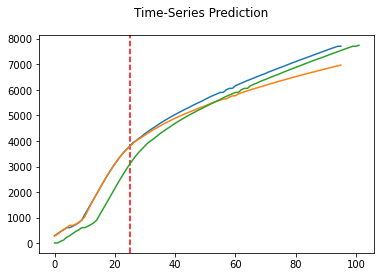

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.plot(dataframe_Tajikistan['Confirmed'])
plt.suptitle('Time-Series Prediction')
plt.show()

Overall the model is performing fairly well considering the lower number of training samples and the size of the predictions that the model has to make. The Orange line shows the model prediction in the above graph

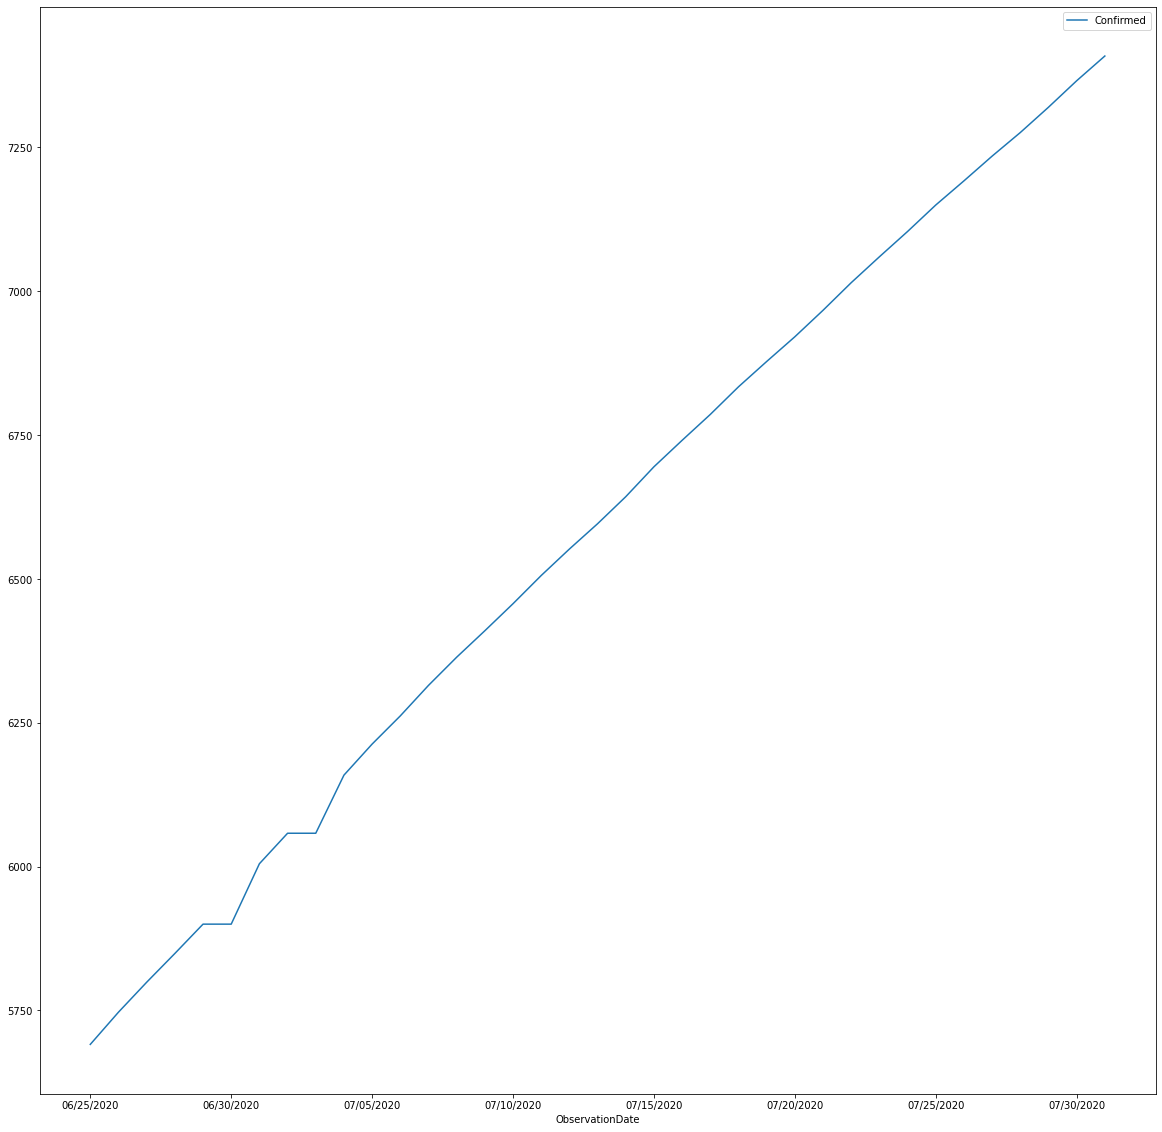

In [ ]:
certain_dates = dataframe_Tajikistan[56:93]
certain_dates.plot.line(x='ObservationDate', figsize=(20,20))

## As can be seen from the graphical visualization, there were certain dips in terms of confirmed cases but the country still has not been able to flatten its curve of COVID 19 cases